# Getting the Data

In [35]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
#Import the required libraries for model training
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
import joblib

In [5]:
#Reading the file
main_data = pd.read_csv("/Users/USER/Documents/ReshmaDataScience/CourseProject/creditcard.csv")
main_data.head() #Displaying the first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
main_data.tail() #displaying the last 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#Getting the information about the dataset
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#finding the no of rows and columns in the dataset
main_data.shape

(284807, 31)

# Data cleaning and Preprocessing

In [9]:
#Check for any null values
main_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values found in any of the columns.

In [10]:
#Find if there are any duplicate values
main_data.duplicated().any()

True

There are duplicate rows in the dataset. So we need to remove them

In [11]:
#There are duplicate values
#Find the rows which are duplicated
df_dup = main_data[main_data.duplicated()]
df_dup

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [12]:
#Drop the duplicate rows
main_data = main_data.drop_duplicates()
main_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


There are 1081 rows of duplicate data found and removed from the data

In [13]:
main_data.shape

(283726, 31)

In [14]:
#Understanding the statistical information of the data
main_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


The statistical information shows the column 'Amount' the range is too high. So we need to transform that column

# Exploratory Data Analysis

In [15]:
main_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

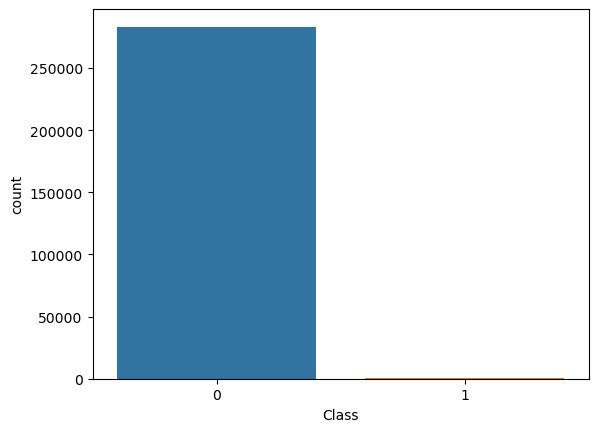

In [16]:
#Plotting the count plot on Class feature to see the count of Normal and Fraud transactions
sns.countplot(data=main_data,x="Class")

In [17]:
#Plotting the Class distribution with labels for better understanding
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

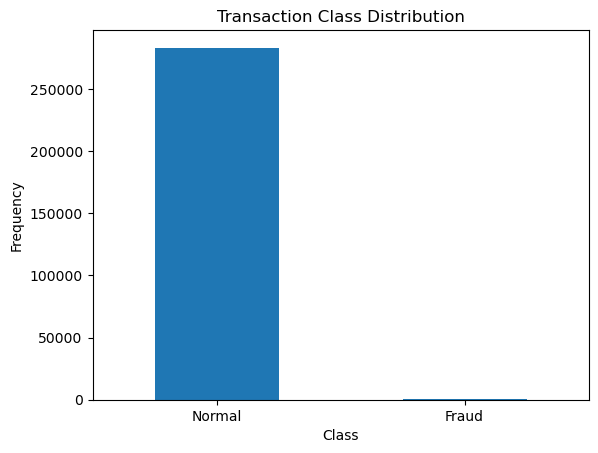

In [18]:
count_classes = pd.value_counts(main_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

This shows the data is highly imbalanced and there are very few fraud transactions as compared to normal transactions

C:\Users\USER\AppData\Local\Temp\ipykernel_13120\328711560.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_13120\328711560.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data[column])
C:\Users\USER\AppData\Local\Temp\i

C:\Users\USER\AppData\Local\Temp\ipykernel_13120\328711560.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data[column])
C:\Users\USER\AppData\Local\Temp\ipykernel_13120\328711560.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data[column])
C:\Users\USER\AppData\Local\Temp\i

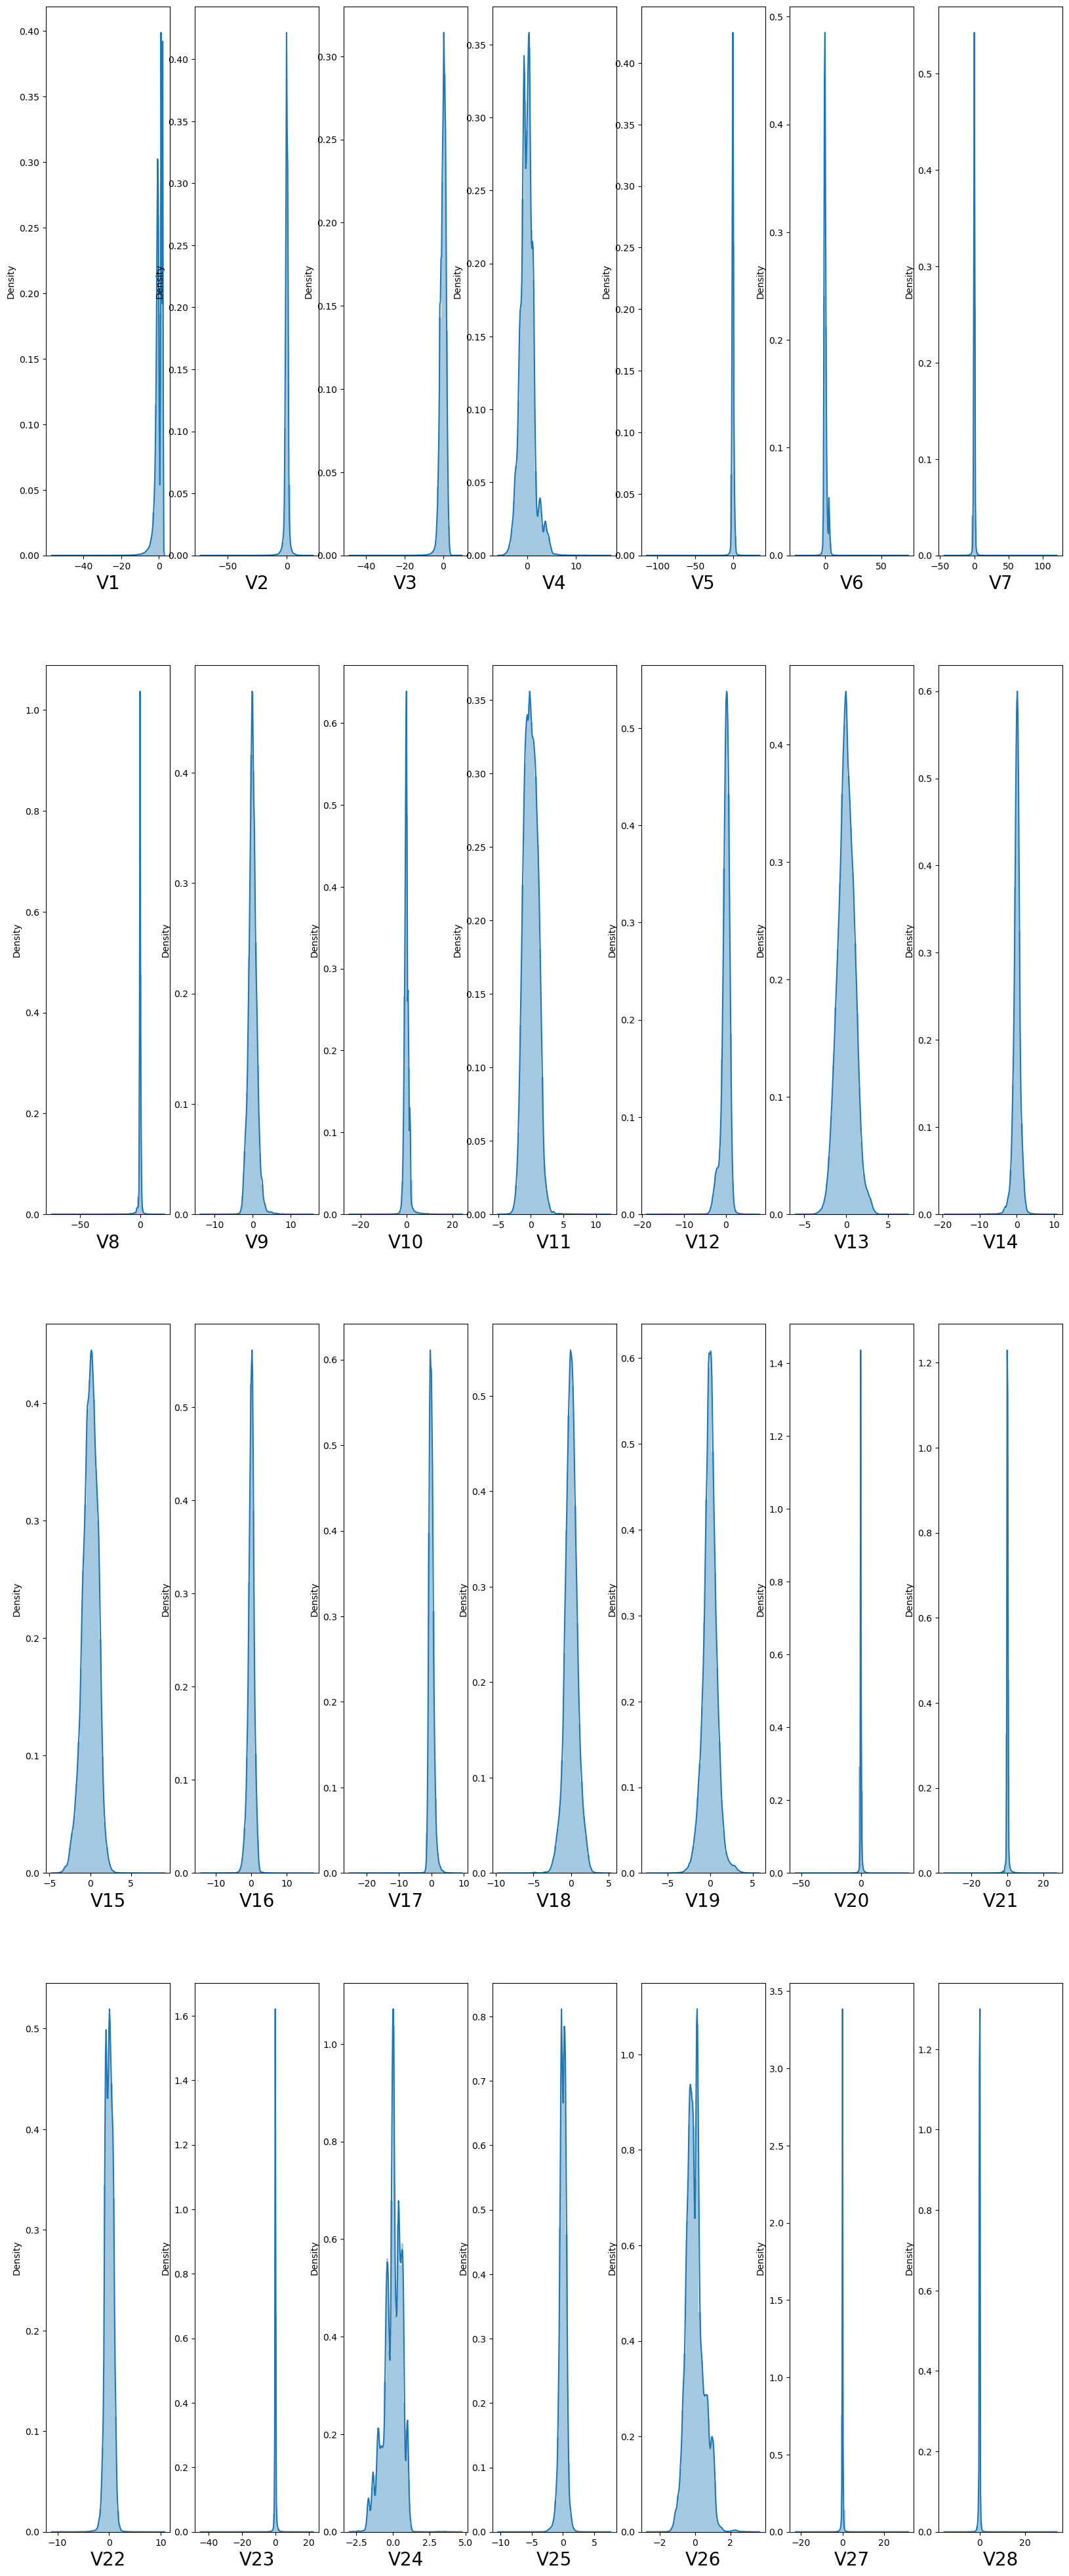

In [20]:
# Plotting the graph to see how data is distributed for all the columns except Time, Amount and Class
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1
#Creating a temp dataframe using only the required columns, dropping the Time , Amount and Class columns
temp_data = main_data.drop(columns=["Time","Amount","Class"],axis=1)

for column in temp_data:
    if plotnumber<=28 :     # as there are 28 columns in the data
        ax = plt.subplot(4,7,plotnumber)
        sns.distplot(temp_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Here the graph for all the features V1-V28 shows that most data is distributed uniformly

C:\Users\USER\AppData\Local\Temp\ipykernel_13120\2468418460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_data["Amount"])


<Axes: xlabel='Amount', ylabel='Density'>

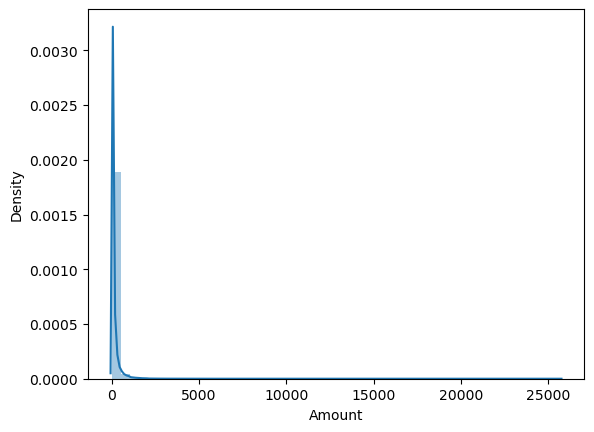

In [21]:
#using distplot to see how Amount, Time and Class column data is distributed
sns.distplot(main_data["Amount"])

#This graph also shows that the Amount column data is highly imbalanced which can affect the output

C:\Users\USER\AppData\Local\Temp\ipykernel_13120\760843633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_data["Time"])


<Axes: xlabel='Time', ylabel='Density'>

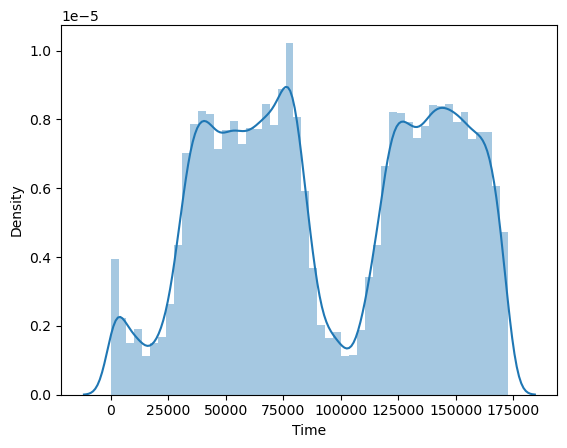

In [22]:
sns.distplot(main_data["Time"])

The Time graph also shows a variation but since it is autogenerated it may not affect the output much

C:\Users\USER\AppData\Local\Temp\ipykernel_13120\213240646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_data["Class"])


<Axes: xlabel='Class', ylabel='Density'>

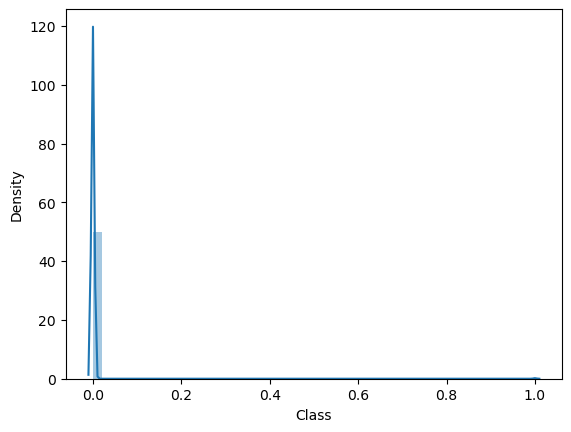

In [23]:
sns.distplot(main_data["Class"])

The class column data is also unbalanced as most of the transactions fall in the Normal category and very few in the Fraud category

<Axes: >

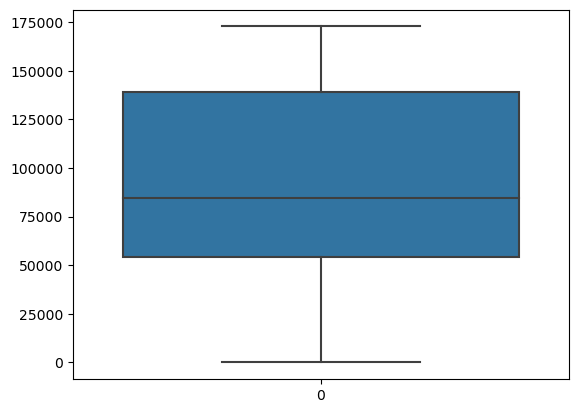

In [24]:
#Boxplots and checking the outliers
sns.boxplot(main_data['Time'])

<Axes: >

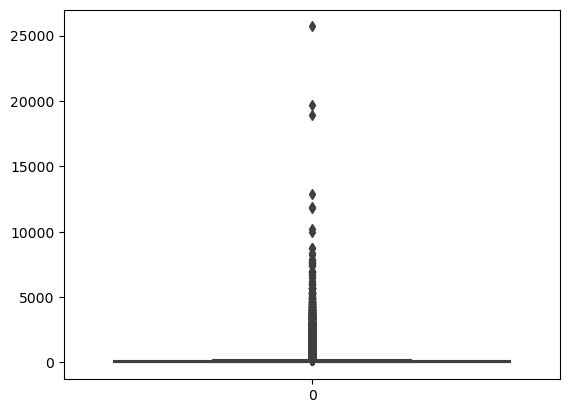

In [25]:
sns.boxplot(main_data['Amount'])

<Axes: >

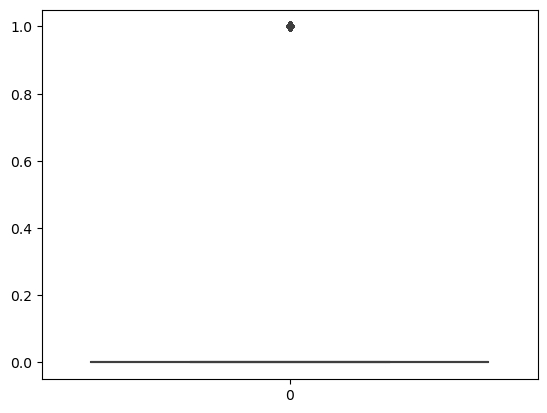

In [26]:
sns.boxplot(main_data['Class'])

Looking at graphs we understand that Amount column has a huge variation. So that column needs to be transformed

In [28]:
#Transforming the data using StandardScaler so that they can be standardised within a particular range for better comparison
#Standard Scaling
sc = StandardScaler()

amount = main_data['Amount'].values

main_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))


# Feature selection and Splitting of data

In [29]:
#Separating the target variable and the features
X = main_data.drop(columns=['Class'], axis=1) # X - feature matrix
y = main_data['Class'] # y - Target

x_scaler = sc.fit_transform(X)
x_scaler  #Now we will get more closer values 

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.18382429,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

<Axes: >

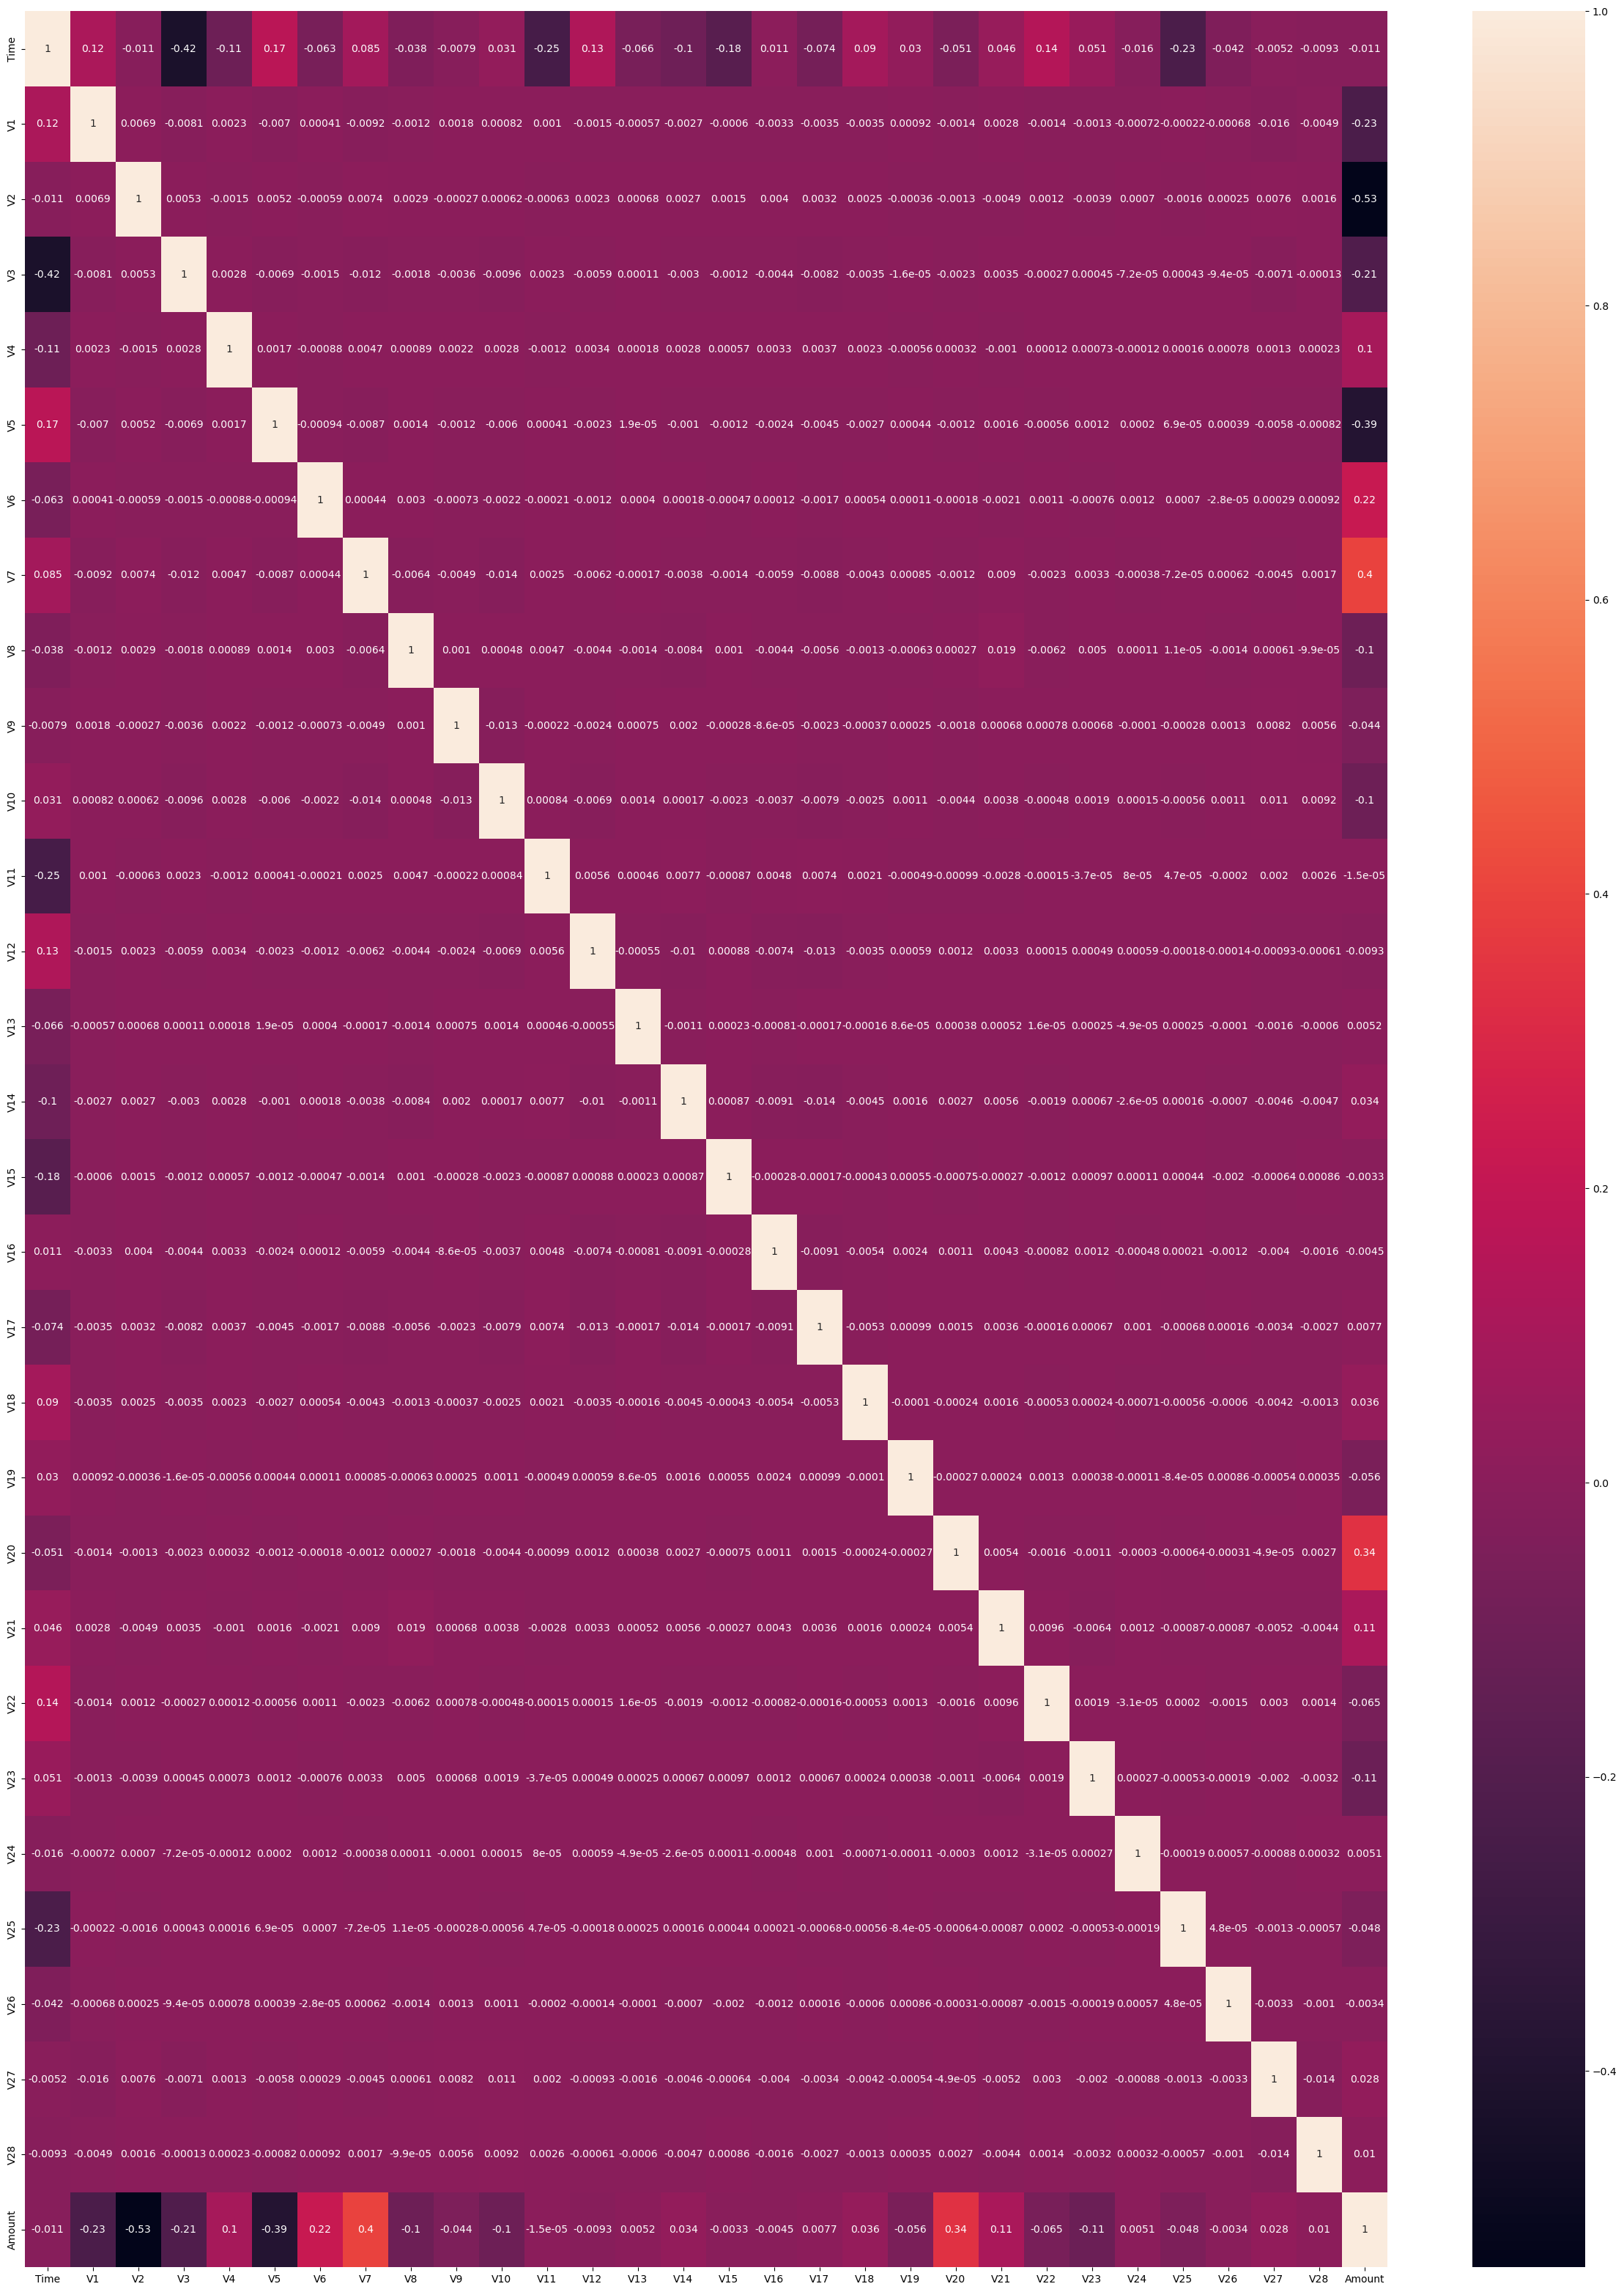

In [30]:
#Correlation Matrix
#Plotting the Matrix to see the correlation between the features
plt.figure(figsize=(30,40))
sns.heatmap(X.corr(),annot=True)

In [31]:
X.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123


The correlation matrix also shows that Amount column has the most effect on the target than other features as very less features seems to impact the target

# Model Training

In [112]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.20, random_state=42,stratify=y)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (226980, 30)
x test:  (56746, 30)
y train:  (226980,)
y test:  (56746,)


In [116]:
#Function to training the different models with the given data and find the different score values
def fraud_detect_model(model,x_train,y_train,x_test,y_test):
    
    #Training Data
    model.fit(x_train,y_train)
    #Testing Data
    y_pred = model.predict(x_test)
    
    #Training accuracy
    train_acc = model.score(x_train,y_train)
    print("Training Accuracy: " + str(train_acc))
    
#     #Testing accuracy
#     test_acc = model.score(x_test,y_test)
#     print("Testing Accuracy: " + str(test_acc))
    
    #Testing Accuracy
    acc_val = accuracy_score(y_test,y_pred)
    print("Testing Accuracy : " + str(acc_val))
    
    #Precision score
    precision = precision_score(y_test,y_pred)
    print("Precision score: "  + str(precision))
    
    #Recall score
    recall = recall_score(y_test,y_pred)
    print("Recall: " + str(recall))
    
    #f1 score
    f1 = f1_score(y_test,y_pred)
    print("F1 score: " + str(f1))
    
    return acc_val

# 1.Logistic Regression

In [117]:

log_reg = LogisticRegression()


#Calling the function for training the model and finding the various model scores
log_reg_acc_orig = fraud_detect_model(log_reg,x_train,y_train,x_test,y_test)


Training Accuracy: 0.999242223984492
Testing Accuracy : 0.9991188806259472
Precision score: 0.8461538461538461
Recall: 0.5789473684210527
F1 score: 0.6875


# 2. K-Nearest Neighbors (KNN)

In [118]:

knn = KNeighborsClassifier()

#Calling the function for training the model and finding the various model scores
knn_acc_orig = fraud_detect_model(knn,x_train,y_train,x_test,y_test)


Training Accuracy: 0.9995990836197022
Testing Accuracy : 0.9994008388256441
Precision score: 0.9552238805970149
Recall: 0.6736842105263158
F1 score: 0.7901234567901234


# 3. Random Forest

In [119]:

ran_for = RandomForestClassifier()

#Calling the function for training the model and finding the various model scores
ran_for_acc_orig = fraud_detect_model(ran_for,x_train,y_train,x_test,y_test)


Training Accuracy: 1.0
Testing Accuracy : 0.9995594403129736
Precision score: 0.9861111111111112
Recall: 0.7473684210526316
F1 score: 0.8502994011976047


# Comparing the accuracy of different models using original data

In [122]:
acc_eval_orig = pd.DataFrame({'Models':['LR','KN','RF'],
              "ACCURACY":[log_reg_acc_orig*100,
                     knn_acc_orig*100,
                     ran_for_acc_orig*100
                    ]})

In [123]:
acc_eval_orig

,Models,ACCURACY
0,LR,99.911888
1,KN,99.940084
2,RF,99.955944


<Axes: xlabel='Models', ylabel='ACCURACY'>

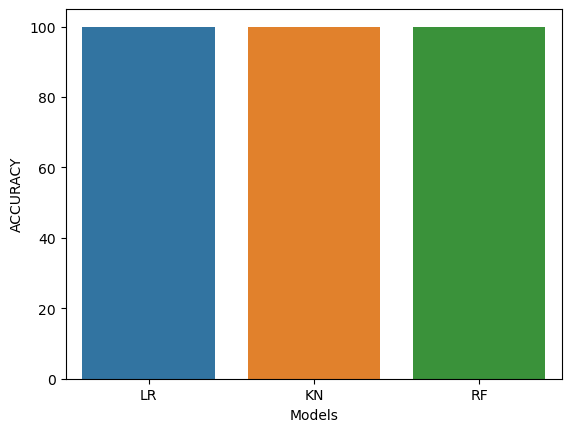

In [124]:
sns.barplot(x=acc_eval_orig['Models'],y=acc_eval_orig['ACCURACY'])

# Handling Class Imbalance

After training on 3 different models, Random Forest have high accuracy. But there is imbalance in data where majority transactions are Normal and very less Fraud. Since the data is highly imbalanced we need to do under sampling and over sampling also on the dataset to have a better understanding.

In [125]:
#Splitting normal and fraud data
actual = main_data[main_data['Class']==0]
fraud = main_data[main_data['Class']==1]

# Under Sampling

In [126]:
actual_sample = actual.sample(n=473) #sampling random 473 rows from actual transactions for undersampling

In [127]:
actual_sample.shape

(473, 31)

In [128]:
under_sample = pd.concat([actual_sample,fraud],ignore_index=True)

In [129]:
under_sample.head() #first 5 rows of the undersampled dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,28580.0,0.929156,-1.499730,0.919232,-0.569157,-1.473876,0.781494,-1.302138,0.474007,-0.163835,...,0.491941,1.109592,-0.173686,-0.266347,0.173680,-0.015934,0.040927,0.032225,0.299951,0
1,72827.0,-1.574114,1.903130,1.157589,1.538652,-0.065232,-0.049519,0.203384,0.691585,-0.975915,...,-0.197385,-0.726416,-0.027552,-0.097049,-0.158459,-0.290010,0.286513,0.212183,-0.331641,0
2,63641.0,-4.744386,-4.864041,-0.700090,2.132830,1.640772,0.283906,0.698347,0.744586,-0.992919,...,0.789206,-0.362230,1.033390,-1.739377,0.994161,-0.035478,-0.211343,-0.593737,2.431788,0
3,122453.0,1.795209,-0.500902,-0.893176,0.603987,0.296205,0.906529,-0.222398,0.233102,1.344222,...,-0.234870,-0.171375,0.289255,-1.013547,-0.206478,-0.409587,0.068846,-0.054319,-0.195978,0
4,121651.0,-1.034134,-0.513680,-0.508605,-2.196179,-0.108863,-1.061009,0.285154,0.338305,-1.369225,...,0.715000,1.498015,0.055078,-0.320780,-0.289020,-0.136602,0.242472,0.101718,0.188808,0


In [130]:
#Separating the target variable and the features of the sampled data
X = under_sample.drop('Class',axis=1)
y = under_sample['Class']

In [131]:
#Trying different classification model on the under sampled data
#Splitting the data into training and testing
#from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 1.Logistic Regression

In [132]:
#from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#Calling the function for training the model and finding the various model scores
log_reg_acc_under = fraud_detect_model(log_reg,x_train,y_train,x_test,y_test)

Training Accuracy: 0.9298941798941799
Testing Accuracy : 0.9368421052631579
Precision score: 0.96875
Recall: 0.9117647058823529
F1 score: 0.9393939393939394


# 2. K-Nearest Neighbors (KNN)

In [133]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Calling the function for training the model and finding the various model scores
knn_acc_under = fraud_detect_model(knn,x_train,y_train,x_test,y_test)


Training Accuracy: 0.7526455026455027
Testing Accuracy : 0.5947368421052631
Precision score: 0.6262626262626263
Recall: 0.6078431372549019
F1 score: 0.6169154228855721


# 3. Random Forest

In [135]:
#from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier()

#Calling the function for training the model and finding the various model scores
ran_for_acc_under = fraud_detect_model(ran_for,x_train,y_train,x_test,y_test)


Training Accuracy: 1.0
Testing Accuracy : 0.9210526315789473
Precision score: 0.9484536082474226
Recall: 0.9019607843137255
F1 score: 0.9246231155778893


# Comparing the accuracy of different models using under sampled data

In [136]:
acc_eval_under = pd.DataFrame({'Models':['LR','KN','RF'],
              "ACCURACY":[log_reg_acc_under*100,
                     knn_acc_under*100,
                     ran_for_acc_under*100
                    ]})

In [137]:
acc_eval_under

,Models,ACCURACY
0,LR,93.684211
1,KN,59.473684
2,RF,92.105263


<Axes: xlabel='Models', ylabel='ACCURACY'>

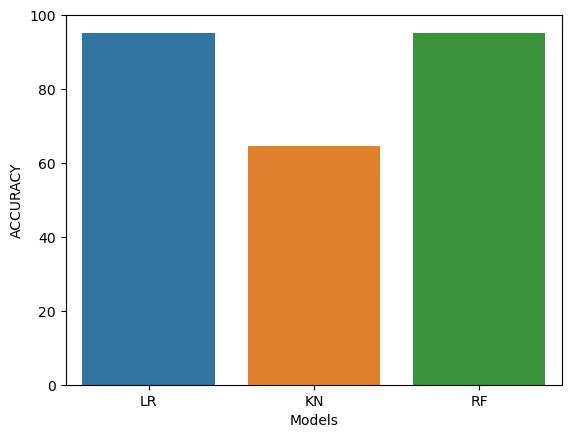

In [97]:
sns.barplot(x=acc_eval_under['Models'],y=acc_eval_under['ACCURACY'])

After under sampling the Logistic Regression model have improved. But Random Forest model is still performing better.

# Over Sampling

In [138]:
#Separating the target variable and the features of the sampled data
X = main_data.drop('Class',axis=1)
y = main_data['Class']

In [139]:
X.shape

(283726, 30)

In [140]:
y.shape

(283726,)

In [141]:
#Resampling the data to create more no of fraud data as there normal transactions
X_res,y_res = SMOTE().fit_resample(X,y)

In [142]:
y_res.value_counts() #Now we will have as many fraud transactions as there were initial normal transactions

0    283253
1    283253
Name: Class, dtype: int64

In [143]:
#Trying different classification model on the over sampled data
#Splitting the data into training and testing
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# 1. Logistic Regression 

In [144]:
#from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#Calling the function for training the model and finding the various model scores
log_reg_acc_over = fraud_detect_model(log_reg,x_train,y_train,x_test,y_test)

Training Accuracy: 0.9718338761352503
Testing Accuracy : 0.9715892040740676
Precision score: 0.9810176546576719
Recall: 0.9619803304069389
F1 score: 0.9714057295136576


# 2. K-Nearest Neighbors (KNN)

In [106]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Calling the function for training the model and finding the various model scores
knn_acc_over = fraud_detect_model(knn,x_train,y_train,x_test,y_test)

Training Accuracy: 0.9883959541398576
Testing Accuracy: 0.9805299112107465
Accuracy Score: 0.9805299112107465
Precision score: 0.9810852221693876
Recall: 0.9800840971867908
F1 score: 0.9805844041541982


# 3. Random Forest

In [145]:
#from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier()

#Calling the function for training the model and finding the various model scores
ran_for_acc_over = fraud_detect_model(ran_for,x_train,y_train,x_test,y_test)


Training Accuracy: 1.0
Testing Accuracy : 0.9999117403046724
Precision score: 0.9998240954106493
Recall: 1.0
F1 score: 0.999912039969038


# Comparing the accuracy of different models using over sampled data

In [146]:
acc_eval_over = pd.DataFrame({'Models':['LR','KN','RF'],
              "ACCURACY":[log_reg_acc_over*100,
                     knn_acc_over*100,
                     ran_for_acc_over*100
                    ]})

In [147]:
acc_eval_over

,Models,ACCURACY
0,LR,97.158920
1,KN,98.052991
2,RF,99.991174


<Axes: xlabel='Models', ylabel='ACCURACY'>

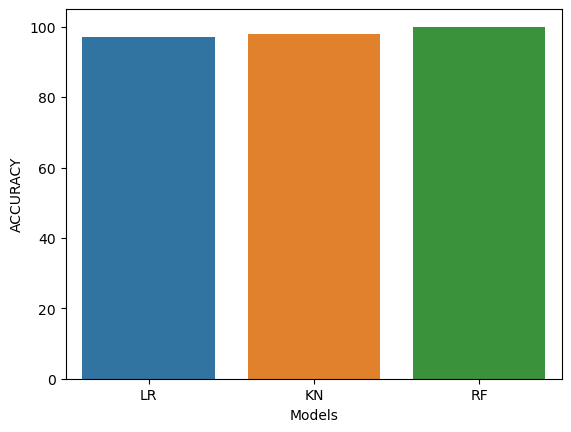

In [148]:
sns.barplot(x=acc_eval_over['Models'],y=acc_eval_over['ACCURACY'])

After oversampling, all the model accuracies have improved. But looking at the overall model accuracies for different models, the RandomForest model after over sampling seems to be the best fit model. So we need to save this model.

# Save the best fitting model

In [149]:
model_final = RandomForestClassifier()
model_final.fit(X_res,y_res)

RandomForestClassifier()

In [150]:
import joblib
joblib.dump(model_final,"fraud_detect_model")

['fraud_detect_model']

In [152]:
pred = model_final.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [153]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [156]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('/ipykernel_13120/model_credit.pkl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_13120\297686314.py", line 42, in show_entry_fields
    model = joblib.load('/ipykernel_13120/model_credit.pkl')
  File "C:\Users\USER\anaconda3\lib\site-packages\joblib\numpy_pickle.py", line 579, in load
    with open(filename, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/ipykernel_13120/model_credit.pkl'
